**Distribution of gaussian data and k-Means algorithm**

In [110]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [111]:
torch.manual_seed(1)
np.random.seed(69)
u_A=[-0.5,-0.5]
covariance_A=[[1,0.25],[0.25,1]]
u_B=[0.5,0.5]
covariance_B=[[1,0.25],[0.25,1]]

In [112]:
n1=1000
dataA=torch.from_numpy(np.random.multivariate_normal(u_A,covariance_A,n1))
n2=1000
dataB=torch.from_numpy(np.random.multivariate_normal(u_B,covariance_B,n2))
X=torch.cat([dataA,dataB])


In [113]:
X

tensor([[-0.8542, -1.5934],
        [-1.0506, -1.7872],
        [ 0.5194,  1.0065],
        ...,
        [-0.7589, -1.7952],
        [-0.2482, -0.1437],
        [ 0.8376,  0.8631]], dtype=torch.float64)

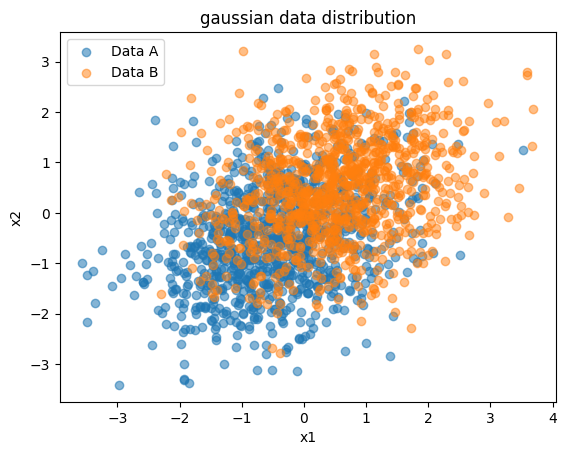

In [114]:
plt.scatter(dataA[:,0],dataA[:,1], alpha=0.55, label='Data A')
plt.scatter(dataB[:,0],dataB[:,1], alpha=0.5, label='Data B')
plt.legend()
plt.title('gaussian data distribution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [115]:
centroids=X[torch.randint(0,X.shape[0],(2,))]
centroids

tensor([[ 0.7173, -0.9292],
        [-1.0412, -0.9986]], dtype=torch.float64)

In [116]:
#k means
for i in range(200):
  distance=torch.cdist(X,centroids)
  cluster_labels=torch.argmin(distance,dim=1)
  centroid_temp=[]
  for j in range(2):
    cluster_pts = X[cluster_labels == j]
    cluster_mean = cluster_pts.mean(dim=0)
    centroid_temp.append(cluster_mean)
  centroid_new = torch.stack(centroid_temp)
  if torch.all(centroids==centroid_new):
    break
  centroids=centroid_new

In [117]:
centroids

tensor([[ 0.7430,  0.7526],
        [-0.7415, -0.8210]], dtype=torch.float64)

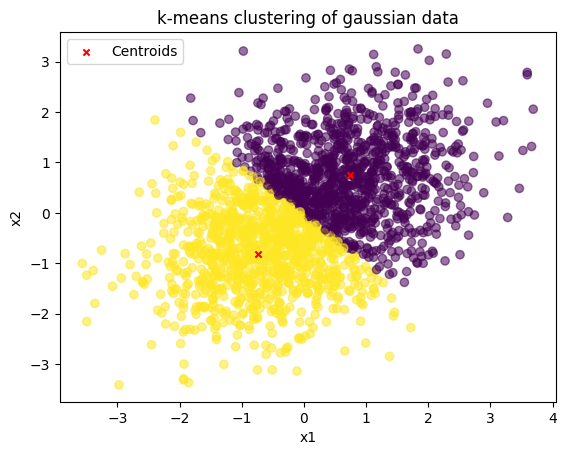

In [118]:
plt.scatter(X[:,0], X[:,1], c=cluster_labels.numpy(), alpha=0.55)
plt.scatter(centroids[:,0],centroids[:,1],c='red', marker='x', s=20, label='Centroids')
plt.legend()
plt.title('k-means clustering of gaussian data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**Principal component analysis**

In [119]:
#data for pca
X1=np.random.normal(0, 1, (100, 4))
X1[:,2]=3*X1[:,0]-2*X1[:,1]+np.random.normal(0, 0.1, 100)
X1[:,3]=1.5*X1[:,0]-0.5*X1[:,1]+np.random.normal(0, 0.1, 100)

In [120]:
X1=X1-np.mean(X1,axis=0)
X1=torch.from_numpy(X1)

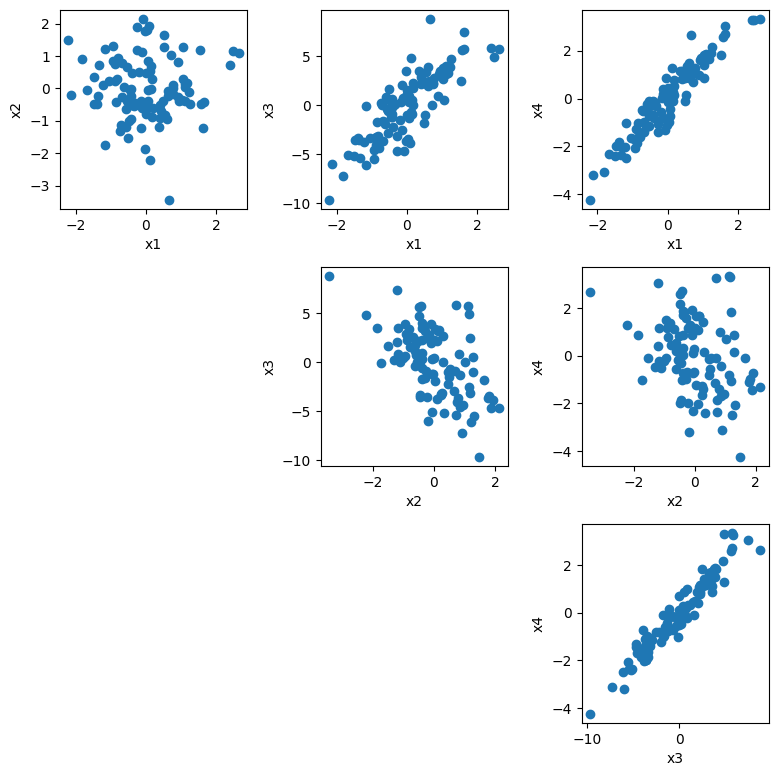

In [121]:
plt.figure(figsize=(10,10))
for i in range(4):
  for j in range(4):
    if j>i:
      plt.subplot(4,4,i*4+j+1)
      plt.scatter(X1[:,i],X1[:,j])
      plt.xlabel('x'+str(i+1))
      plt.ylabel('x'+str(j+1))
plt.tight_layout()

In [122]:
cov_mat=torch.mm(X1.T,X1)/(X1.shape[0]-1)
cov_mat

tensor([[ 9.1739e-01, -2.0226e-03,  2.7647e+00,  1.3945e+00],
        [-2.0226e-03,  9.2701e-01, -1.8714e+00, -4.7497e-01],
        [ 2.7647e+00, -1.8714e+00,  1.2095e+01,  5.1513e+00],
        [ 1.3945e+00, -4.7497e-01,  5.1513e+00,  2.3670e+00]],
       dtype=torch.float64)

In [123]:
eigenval,eigenvec=torch.linalg.eigh(cov_mat)
eigenval

tensor([5.1408e-04, 7.0809e-03, 1.0618e+00, 1.5237e+01], dtype=torch.float64)

In [124]:
eigenvec

tensor([[ 0.8371, -0.1421,  0.4850, -0.2092],
        [-0.4860, -0.3382,  0.7955,  0.1292],
        [-0.2046, -0.3814, -0.1426, -0.8901],
        [-0.1455,  0.8485,  0.3341, -0.3837]], dtype=torch.float64)

In [125]:
ordering=torch.argsort(torch.abs(eigenval),descending=True)
sorted_eigenvec=eigenvec[:,ordering]
sorted_eigenvec

tensor([[-0.2092,  0.4850, -0.1421,  0.8371],
        [ 0.1292,  0.7955, -0.3382, -0.4860],
        [-0.8901, -0.1426, -0.3814, -0.2046],
        [-0.3837,  0.3341,  0.8485, -0.1455]], dtype=torch.float64)

In [126]:
principal_components=sorted_eigenvec[:,:2]
principal_components

tensor([[-0.2092,  0.4850],
        [ 0.1292,  0.7955],
        [-0.8901, -0.1426],
        [-0.3837,  0.3341]], dtype=torch.float64)

In [127]:
principal_components=principal_components.real
X1_new=torch.mm(X1, principal_components)

In [128]:
print('earlier shape: ',X1.shape)
print('new shape: ',X1_new.shape)

earlier shape:  torch.Size([100, 4])
new shape:  torch.Size([100, 2])


In [129]:
#checking if the answer is right
from sklearn.decomposition import PCA
X1=X1.numpy()
pca=PCA(n_components=2)
pca.fit(X1)
pc=pca.components_.T
for i, component in enumerate(pca.components_):
  print(f"Principal Component {i}: {component}")
  print()

Principal Component 0: [-0.20923826  0.12916823 -0.89011593 -0.38370372]

Principal Component 1: [-0.48503037 -0.79545666  0.14262384 -0.33414472]



**Environment Setup**

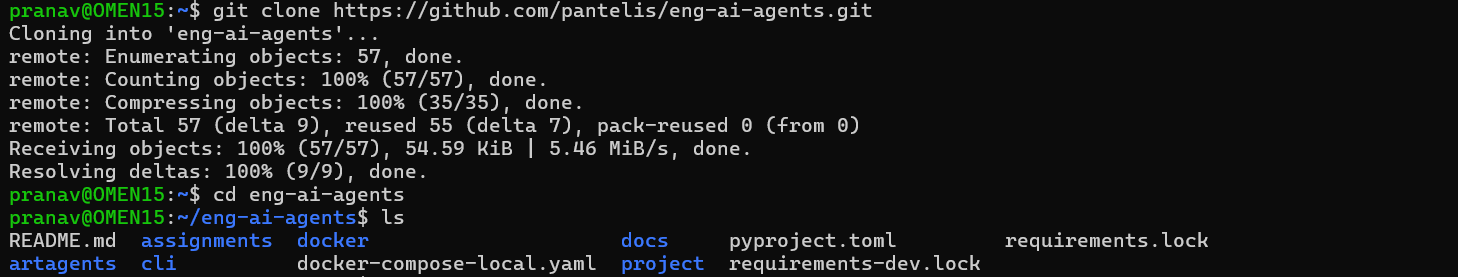